In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
plt.rcParams['figure.figsize'] = 8, 6

In [5]:
train = pd.read_csv('data/pendigits.tra')
train.head()

,47,100,27,81,57,37,26,0,0.1,23,56,53,100.1,90,40,98,8
0,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
1,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
2,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
3,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1
4,100,100,88,99,49,74,17,47,0,16,37,0,73,16,20,20,6


In [6]:
train.columns = ['x1','y1','x2','y2','x3','y3','x4','y4','x5','y5','x6','y6','x7','y7','x8','y8','label']
train.head()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,label
0,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
1,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
2,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
3,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1
4,100,100,88,99,49,74,17,47,0,16,37,0,73,16,20,20,6


In [7]:
Xtrain = train.drop(['label'], axis=1)
Xtrain.head()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8
0,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6
1,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0
2,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0
3,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0
4,100,100,88,99,49,74,17,47,0,16,37,0,73,16,20,20


In [8]:
test = pd.read_csv('data/pendigits.tes')
test.columns = train.columns
Xtest = test.drop(['label'], axis=1)
ytest = test.label
test.head()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,label
0,80,100,18,98,60,66,100,29,42,0,0,23,42,61,56,98,8
1,0,94,9,57,20,19,7,0,20,36,70,68,100,100,18,92,8
2,95,82,71,100,27,77,77,73,100,80,93,42,56,13,0,0,9
3,68,100,6,88,47,75,87,82,85,56,100,29,75,6,0,0,9
4,70,100,100,97,70,81,45,65,30,49,20,33,0,16,0,0,1


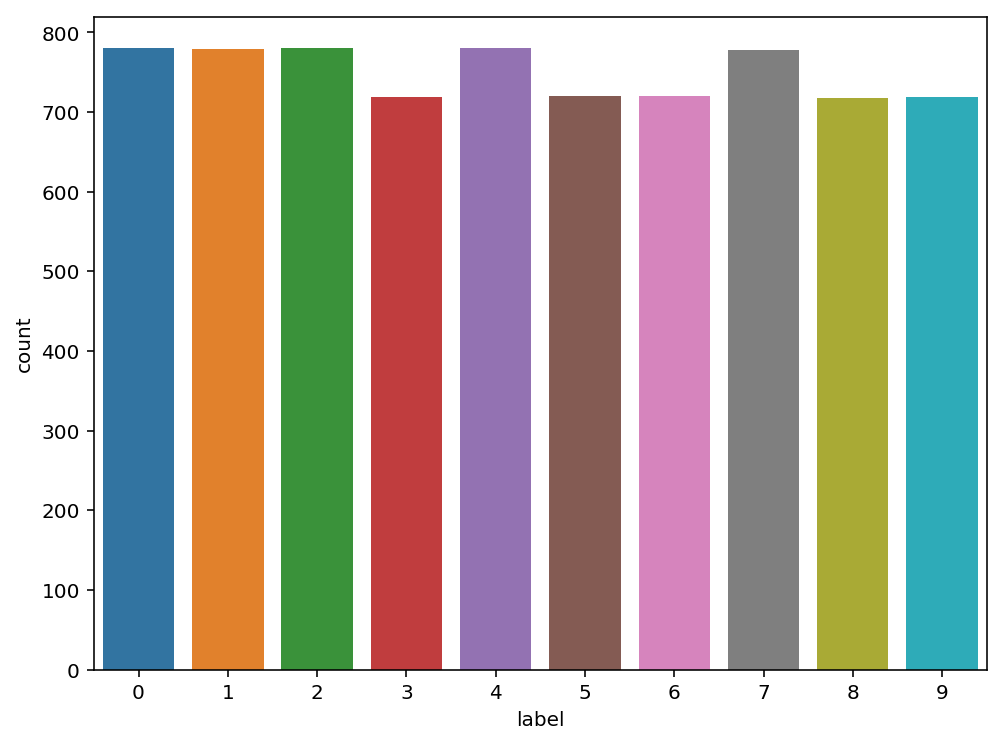

In [9]:
ytrain = train.label
sns.countplot(ytrain)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7493 entries, 0 to 7492
Data columns (total 17 columns):
x1       7493 non-null int64
y1       7493 non-null int64
x2       7493 non-null int64
y2       7493 non-null int64
x3       7493 non-null int64
y3       7493 non-null int64
x4       7493 non-null int64
y4       7493 non-null int64
x5       7493 non-null int64
y5       7493 non-null int64
x6       7493 non-null int64
y6       7493 non-null int64
x7       7493 non-null int64
y7       7493 non-null int64
x8       7493 non-null int64
y8       7493 non-null int64
label    7493 non-null int64
dtypes: int64(17)
memory usage: 995.2 KB


In [11]:
ytrain.value_counts().sort_index().values.sum()

7493

In [12]:
ytest.value_counts().sort_index().values

array([363, 364, 364, 336, 364, 335, 336, 364, 335, 336])

In [13]:
ytrain.count(), ytest.count()

(7493, 3497)

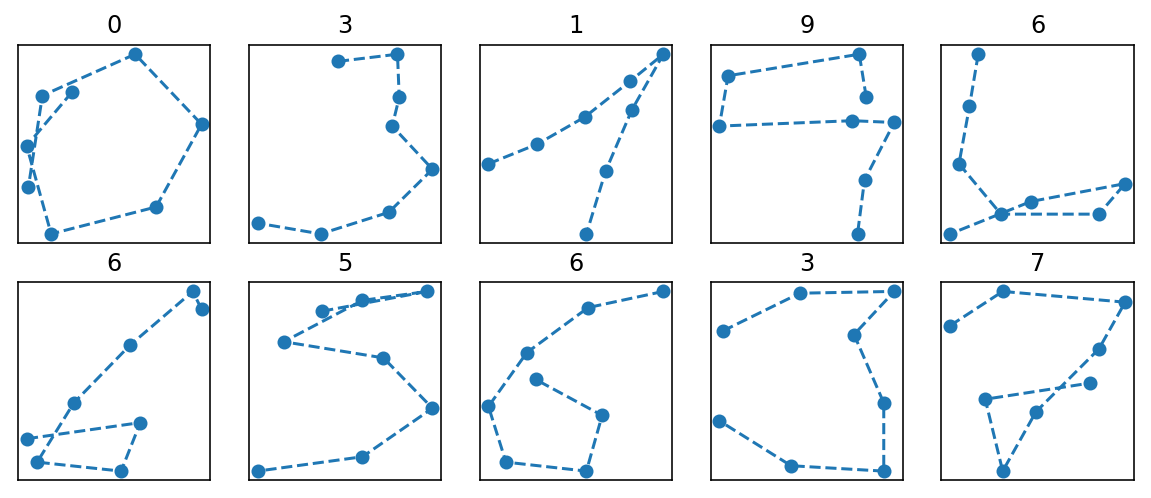

In [14]:
np.random.seed(1)
r, c = 2, 5
ind = np.random.randint(0,Xtrain.shape[0],r*c)
plt.figure(figsize=(10,4))
for i in range(r*c):
    plt.subplot(r,c,i+1)
    p = Xtrain.iloc[ind[i]].values.reshape((8,2))
    plt.plot(p[:,0],p[:,1],'--o')
    plt.title(str(ytrain[ind[i]]))
    plt.xticks([])
    plt.yticks([])

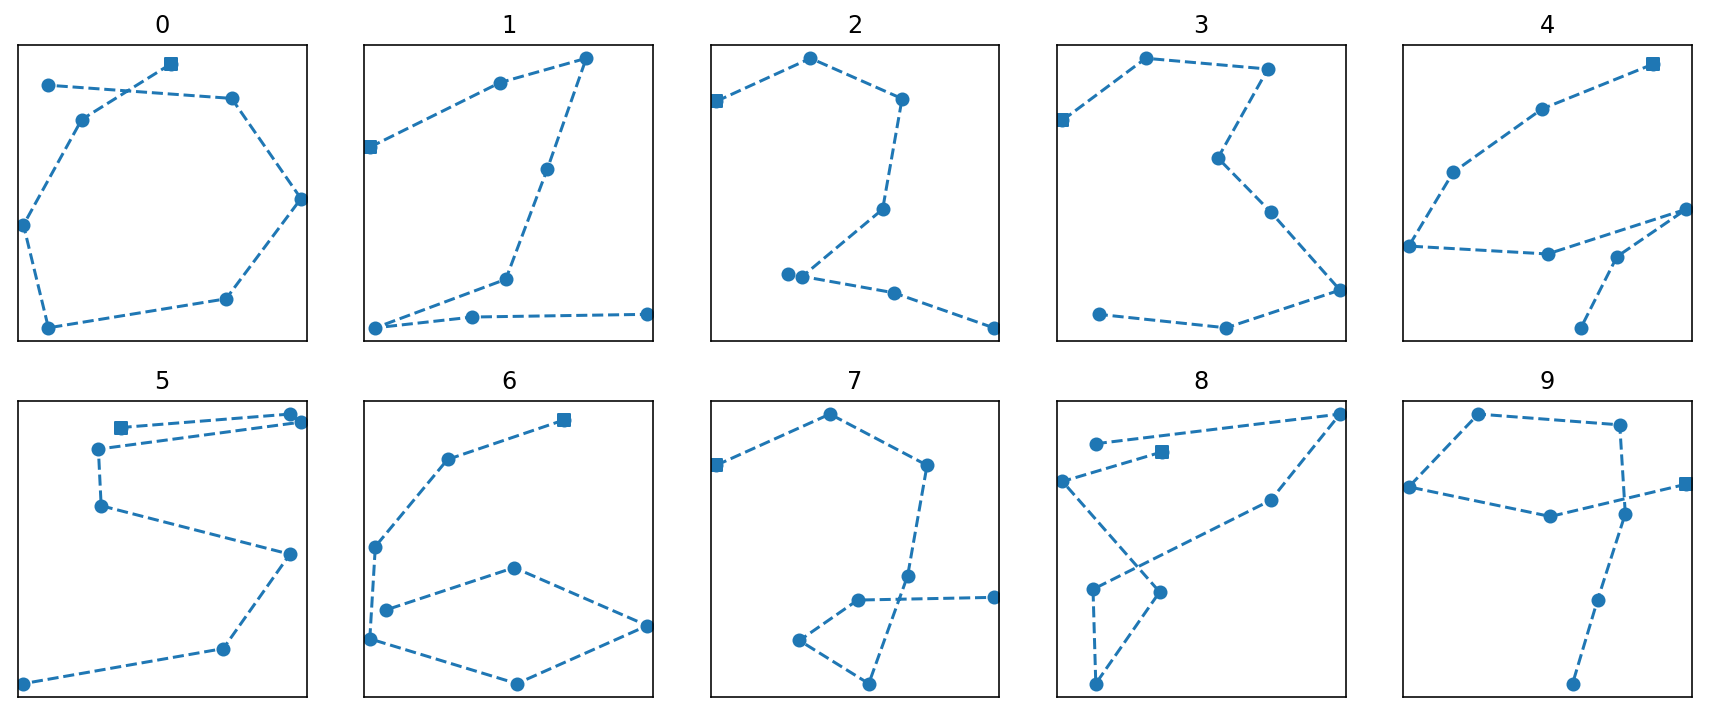

In [88]:
np.random.seed(9) #9,2,44
r, c = 2, 5
ind = [ytrain[ytrain==i].sample(1, replace=False).index[0] for i in range(10)]
plt.figure(figsize=(15,6))
for i in range(r*c):
    plt.subplot(r,c,i+1)
    p = Xtrain.iloc[ind[i]].values.reshape((8,2))
    plt.plot(p[:,0],p[:,1],'--o')
    plt.scatter(p[0,0],p[0,1],marker='s')
    plt.title(str(ytrain[ind[i]]))
    plt.xlim([-2,102])
    plt.xlim([-2,102])
    plt.xticks([])
    plt.yticks([])


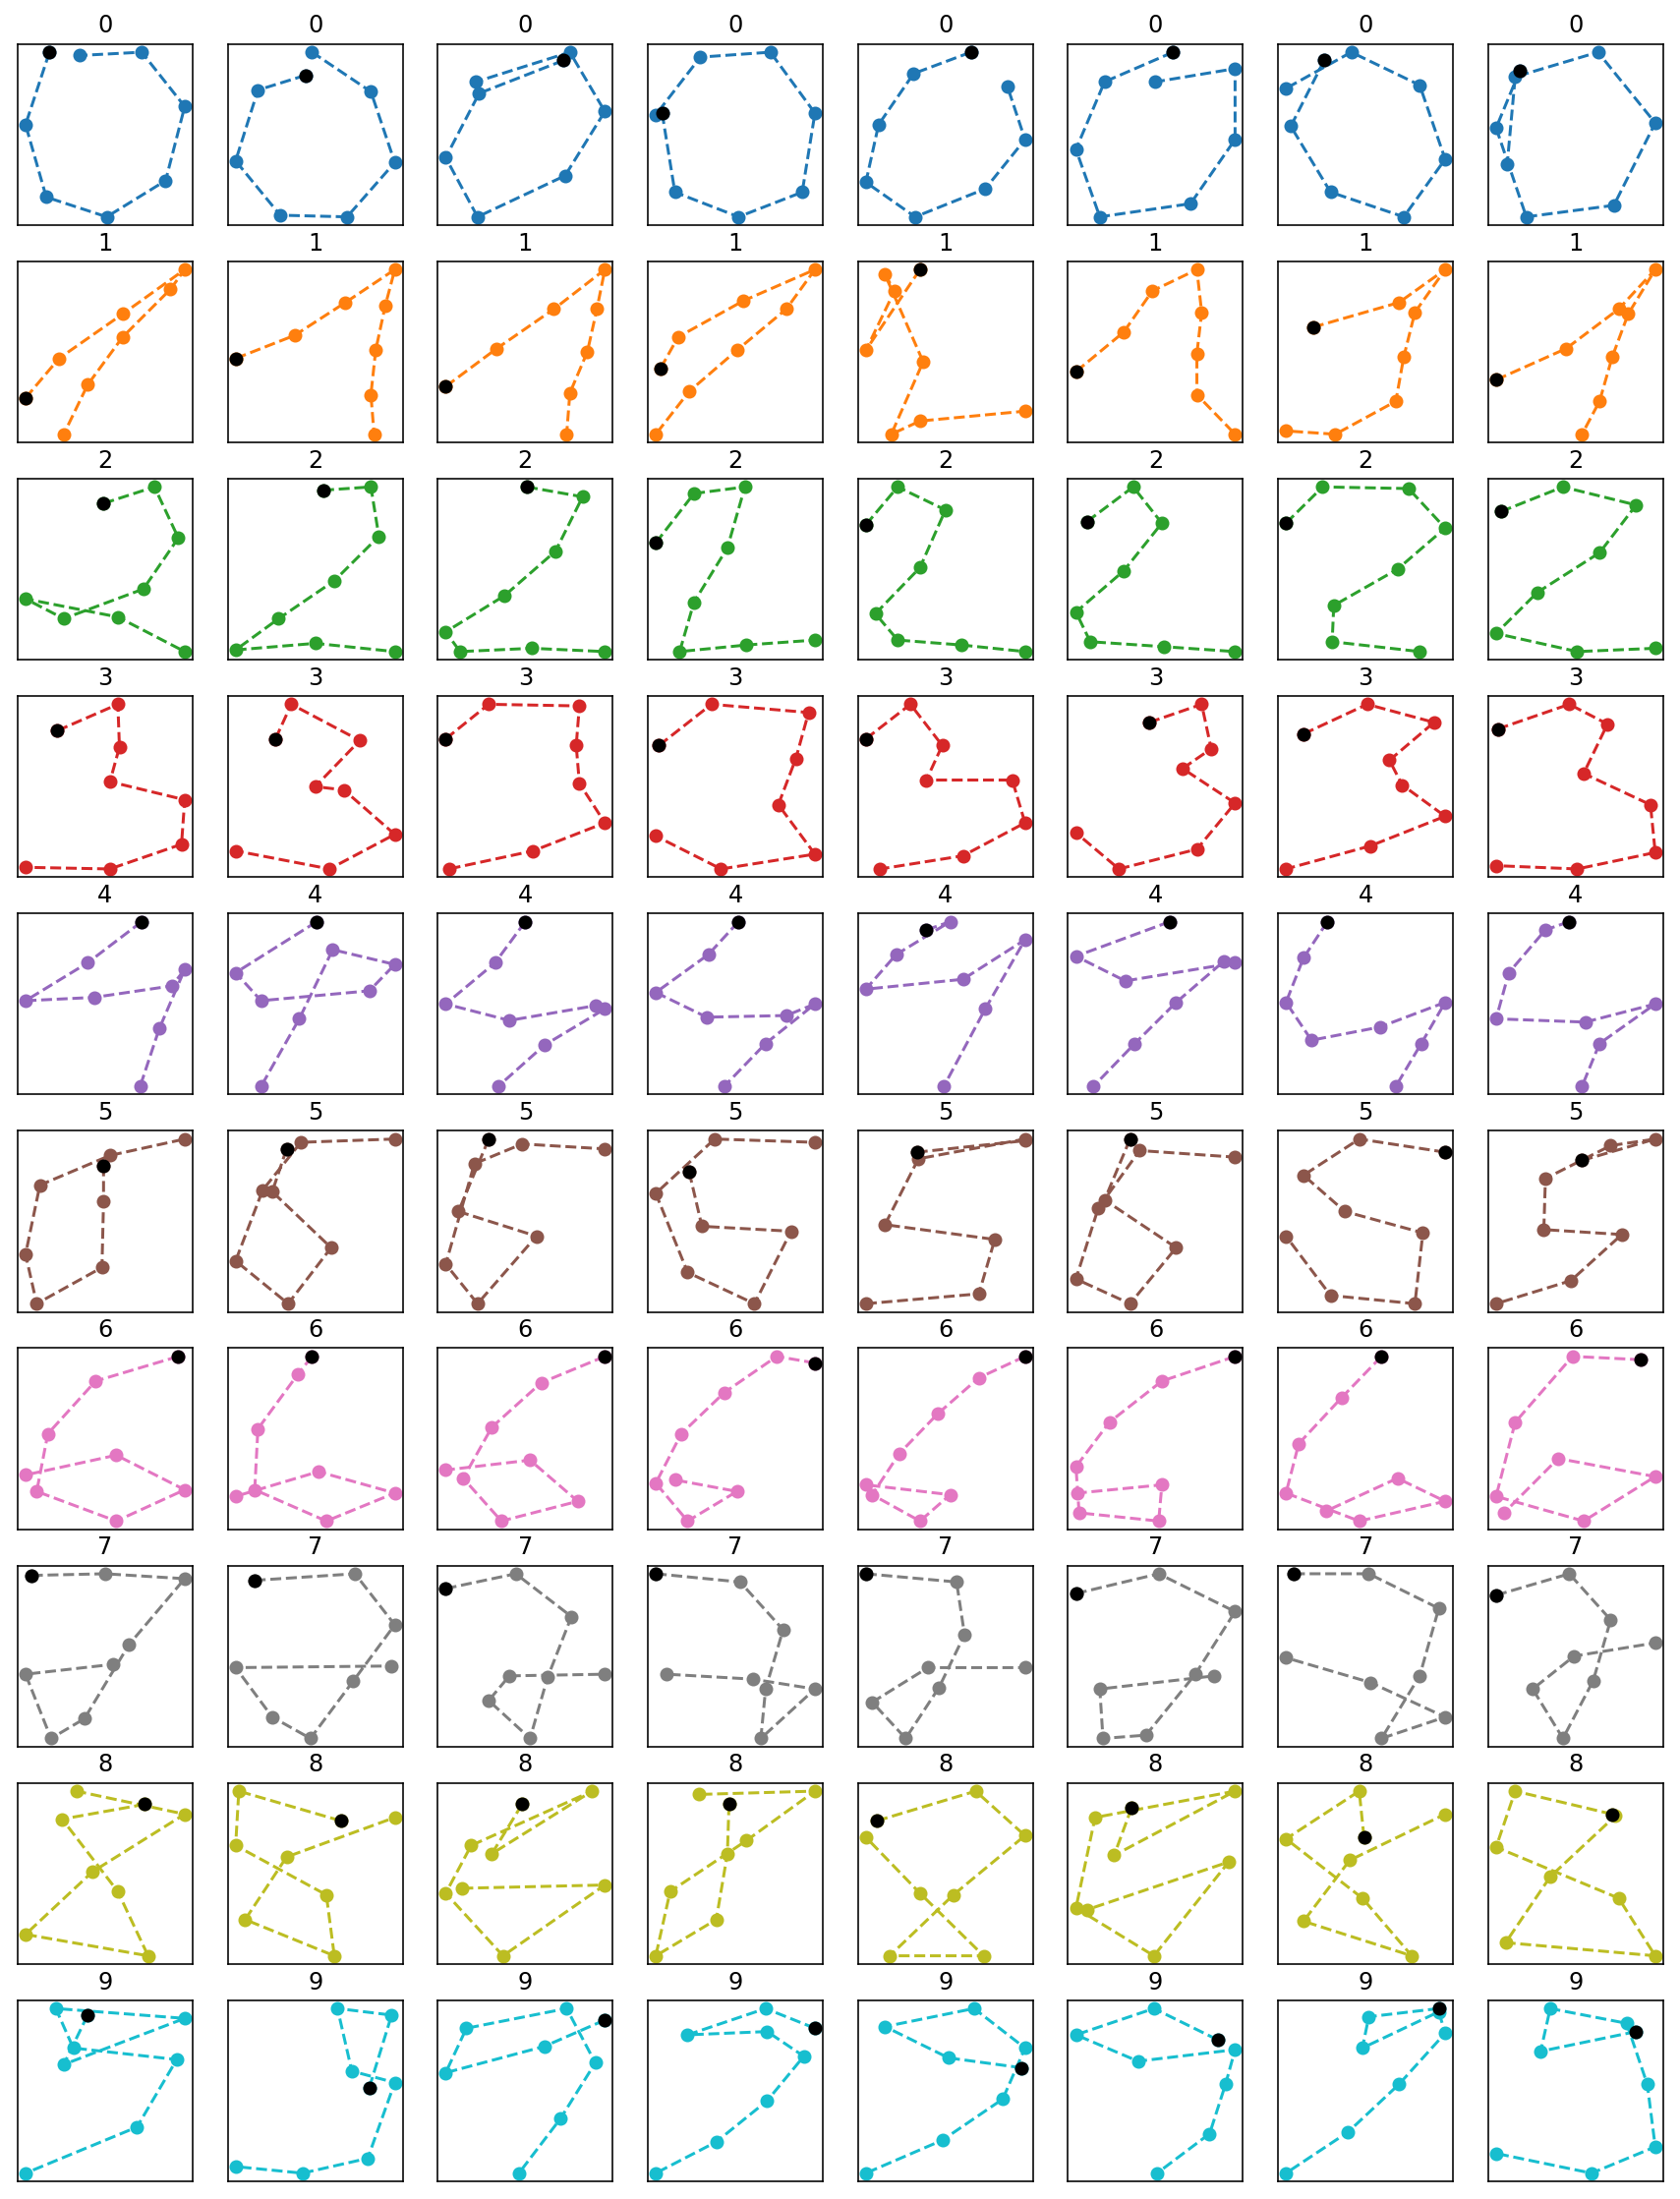

In [16]:
np.random.seed(0)
n_sam = 8
samples = {i:ytrain[ytrain==i].sample(n_sam, replace=False).index for i in range(10)}
plt.figure(figsize=(15,20))
for i in range(10*n_sam):
    dig, sam = i//n_sam, i%n_sam
    plt.subplot(10,n_sam,i+1)
    p = Xtrain.iloc[samples[dig][sam]].values.reshape((8,2))
    plt.plot(p[:,0],p[:,1],'--o',color=cm.get_cmap('tab10')(dig))
    plt.plot(p[0,0],p[0,1],'ok') # black starting point
    plt.title(str(ytrain[samples[dig][sam]]))
    plt.xticks([])
    plt.yticks([])

## KNN

In [17]:
param_grid = {'n_neighbors': range(2,9)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score=True)
grid.fit(Xtrain, ytrain)
# grid.cv_results_

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': range(2, 9)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [18]:
grid.best_params_

{'n_neighbors': 3}

In [19]:
knn = grid.best_estimator_
print('Train accuracy: {}'.format(knn.score(Xtrain, ytrain)))
print('Test accuracy: {}'.format(knn.score(Xtest, ytest)))

Train accuracy: 0.9971973842252769
Test accuracy: 0.9779811266800115


              precision    recall  f1-score   support

           0       1.00      0.98      0.99       363
           1       0.96      0.96      0.96       364
           2       0.97      0.99      0.98       364
           3       0.97      0.99      0.98       336
           4       0.99      0.97      0.98       364
           5       0.96      0.98      0.97       335
           6       0.98      1.00      0.99       336
           7       0.98      0.96      0.97       364
           8       0.99      0.99      0.99       335
           9       0.98      0.95      0.97       336

   micro avg       0.98      0.98      0.98      3497
   macro avg       0.98      0.98      0.98      3497
weighted avg       0.98      0.98      0.98      3497



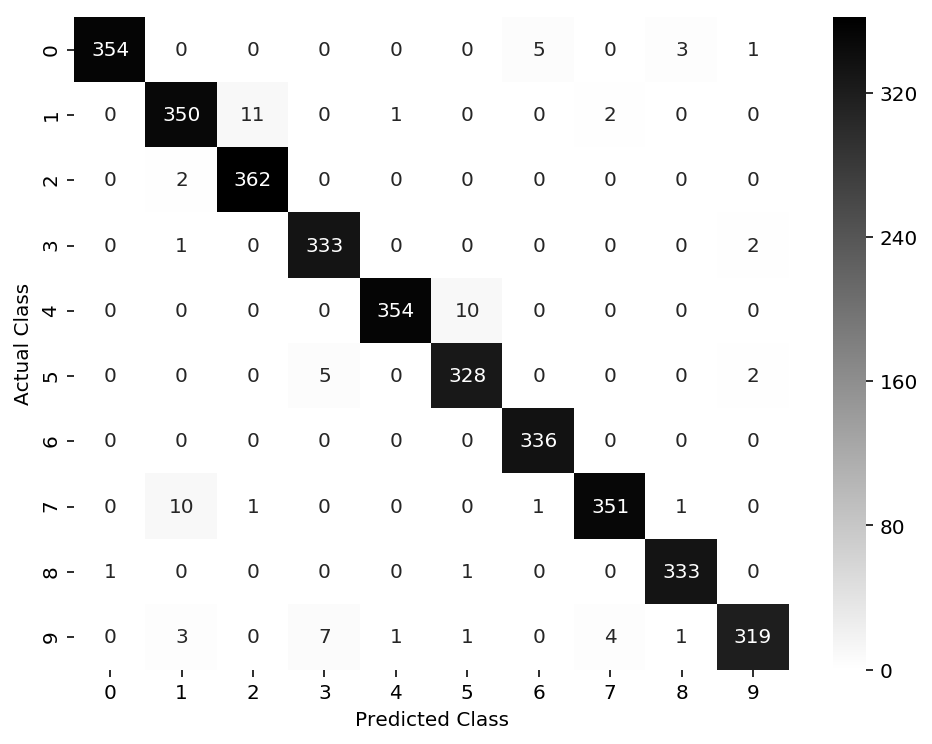

In [20]:
y_pred = knn.predict(Xtest)
print(classification_report(ytest, y_pred))
sns.heatmap(confusion_matrix(ytest, y_pred), annot=True, fmt='1', xticklabels=knn.classes_, yticklabels=knn.classes_, cmap='binary')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

## Decision Trees

In [22]:
np.random.seed(2)
param_grid = {'max_depth': range(1,20), 'criterion':['gini', 'entropy']}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, return_train_score=True)
grid.fit(Xtrain, ytrain)
# grid.cv_results_

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(1, 20), 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [23]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 11}

In [24]:
tree = grid.best_estimator_
print('Train accuracy: {}'.format(tree.score(Xtrain, ytrain)))
print('Test accuracy: {}'.format(tree.score(Xtest, ytest)))

Train accuracy: 0.9977312158014147
Test accuracy: 0.915927938232771


              precision    recall  f1-score   support

           0       0.96      0.97      0.97       363
           1       0.83      0.90      0.87       364
           2       0.88      0.94      0.91       364
           3       0.87      0.93      0.90       336
           4       0.98      0.91      0.95       364
           5       0.92      0.85      0.88       335
           6       0.96      0.90      0.93       336
           7       0.95      0.86      0.90       364
           8       0.90      0.98      0.94       335
           9       0.92      0.91      0.92       336

   micro avg       0.92      0.92      0.92      3497
   macro avg       0.92      0.92      0.92      3497
weighted avg       0.92      0.92      0.92      3497



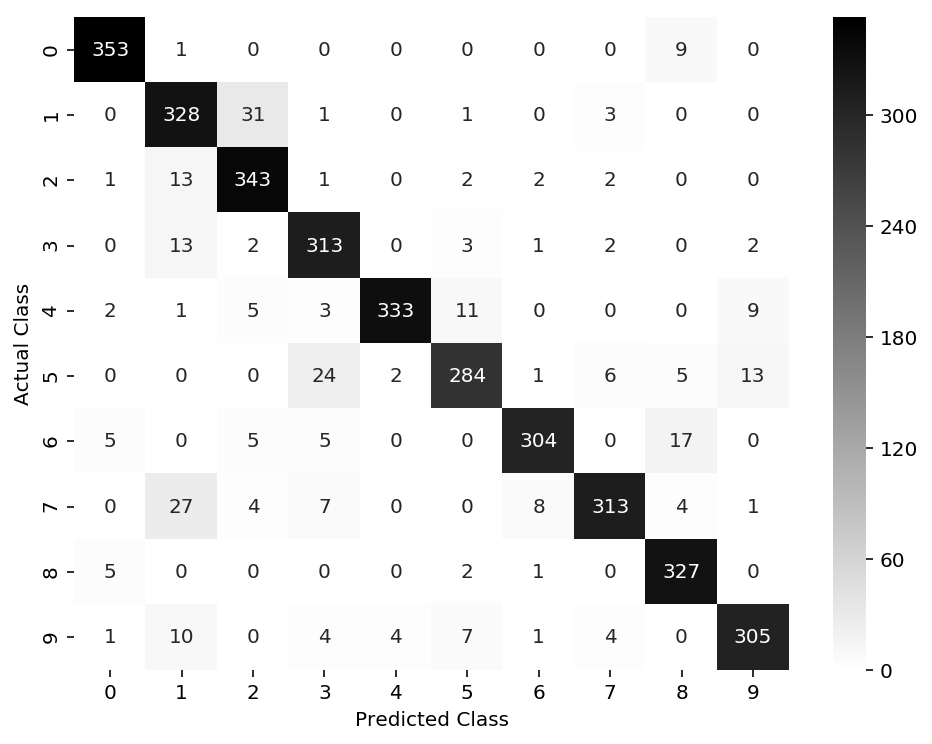

In [25]:
y_pred = tree.predict(Xtest)
print(classification_report(ytest, y_pred))
sns.heatmap(confusion_matrix(ytest, y_pred), annot=True, fmt='1', xticklabels=tree.classes_, yticklabels=tree.classes_, cmap='binary')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

## SVM

In [26]:
np.random.seed(1)
param_grid = {'C':[0.01], 'kernel':['linear']} #{'C':[0.01, 0.1, 1, 10], 'kernel':['linear', 'rbf']}
grid = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
grid.fit(Xtrain, ytrain)
# grid.cv_results_

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01], 'kernel': ['linear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [27]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [28]:
svm = grid.best_estimator_
print('Train accuracy: {}'.format(svm.score(Xtrain, ytrain)))
print('Test accuracy: {}'.format(svm.score(Xtest, ytest)))

Train accuracy: 0.9913252368877619
Test accuracy: 0.9536745782098942


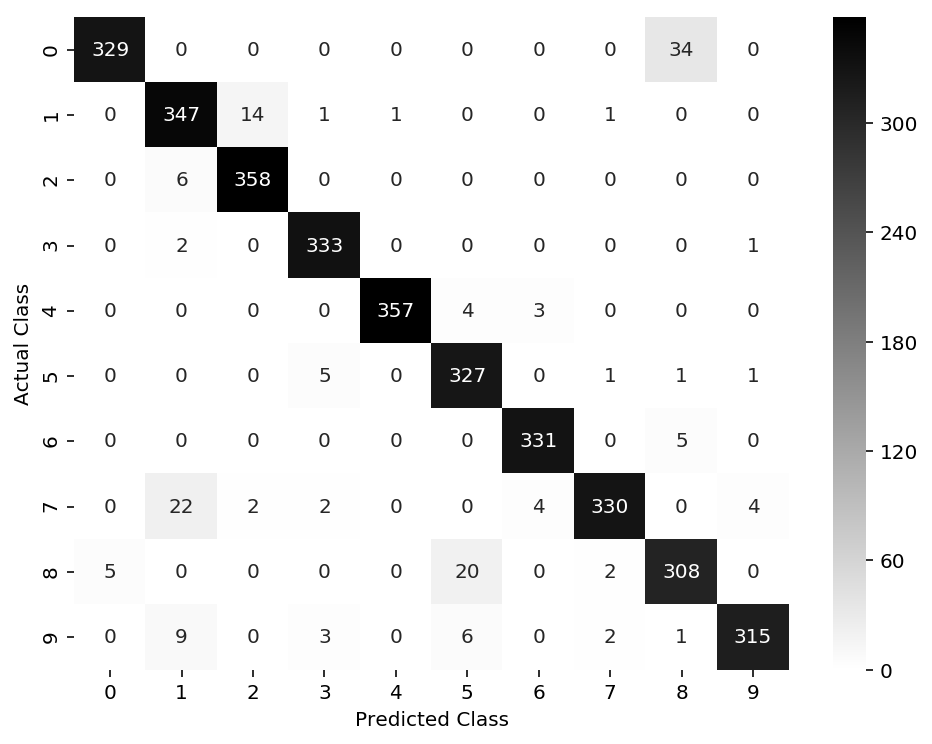

In [29]:
y_pred = svm.predict(Xtest)
sns.heatmap(confusion_matrix(ytest, y_pred), annot=True, fmt='1', xticklabels=svm.classes_, yticklabels=svm.classes_, cmap='binary')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

In [30]:
%%timeit
svm.predict(Xtest)

53.4 ms ± 6.12 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [31]:
%%timeit
tree.predict(Xtest)

1.12 ms ± 118 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [32]:
%%timeit
knn.predict(Xtest)

280 ms ± 31.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


KNN


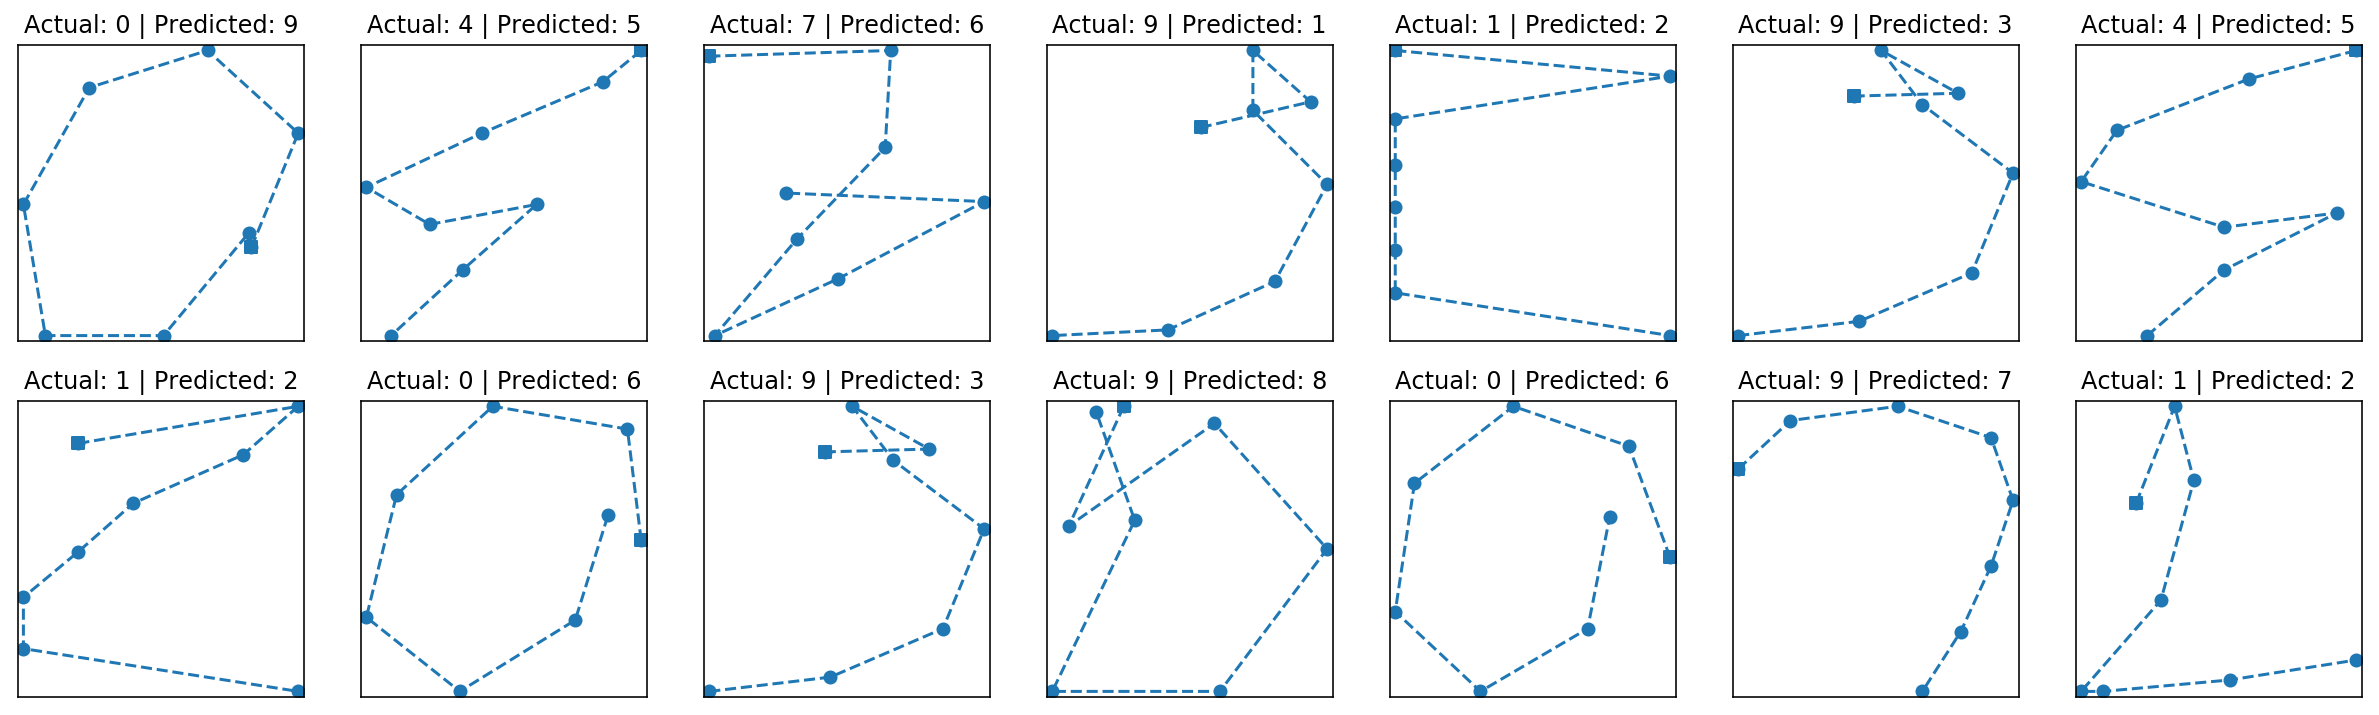

Decision Tree


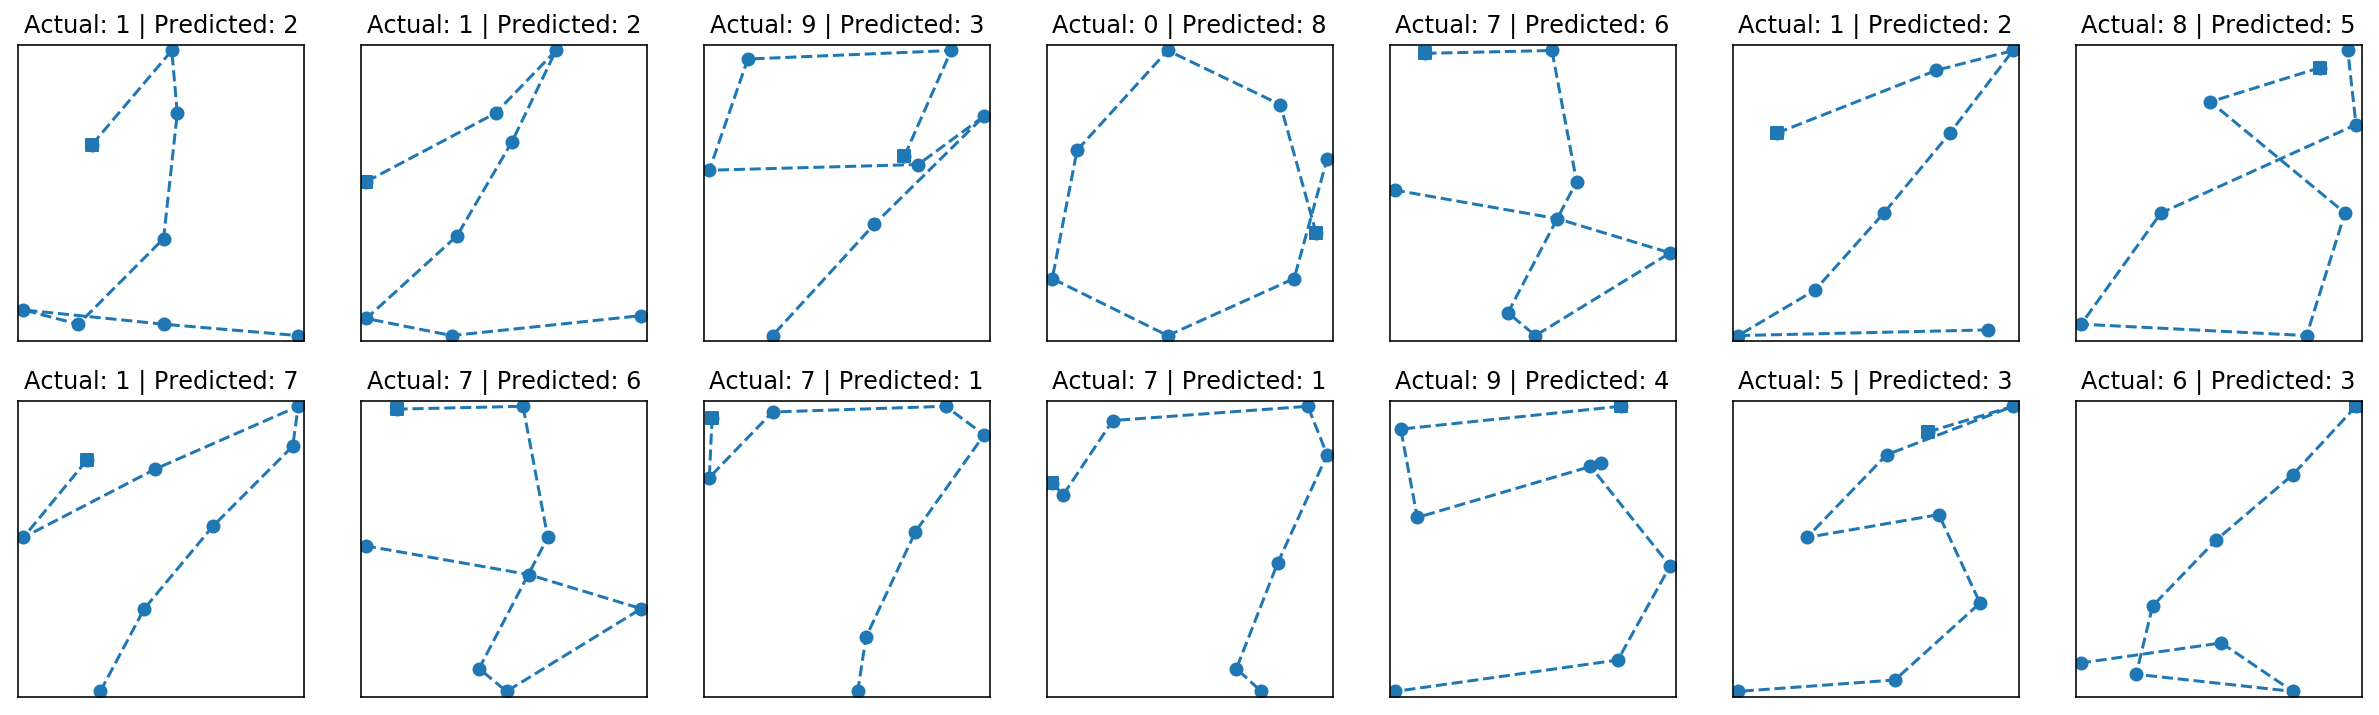

SVM


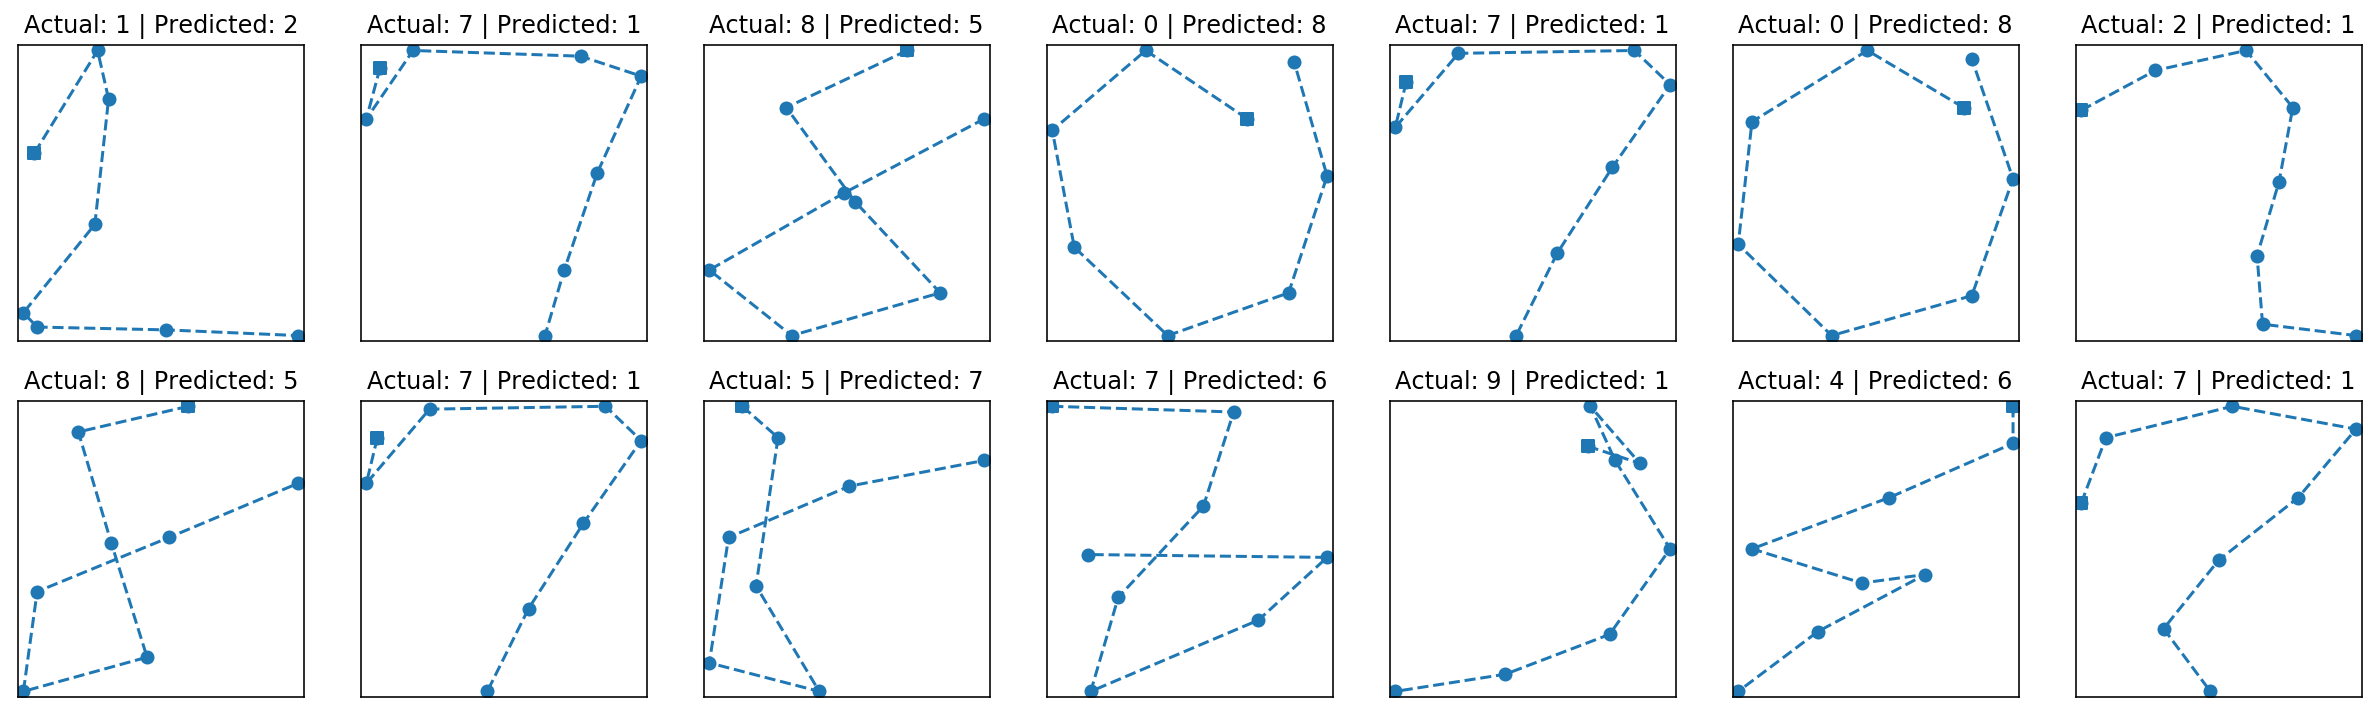

In [89]:
for model, name in [(knn, 'KNN'), (tree, 'Decision Tree'), (svm, 'SVM')]:
    np.random.seed(2)
    y_pred = model.predict(Xtest)
    misclassified = np.where(ytest!=y_pred)[0]
    r, c = 2,7
    samples = np.random.choice(misclassified, r*c)
    fig = plt.figure(figsize=(21,6))
    for i in range(r*c):
        plt.subplot(r,c,i+1)
        p = Xtest.iloc[samples[i]].values.reshape((8,2))
        plt.plot(p[:,0],p[:,1],'--o')
        plt.scatter(p[0,0],p[0,1],marker='s')
        plt.title('Actual: '+str(ytest[samples[i]])+' | Predicted: '+str(y_pred[samples[i]]))
        plt.xlim((-2,102))
        plt.ylim((-2,102))
        plt.xticks([])
        plt.yticks([])
#     fig.suptitle('Examples misclassified by '+ name)
    print(name)
    plt.show()

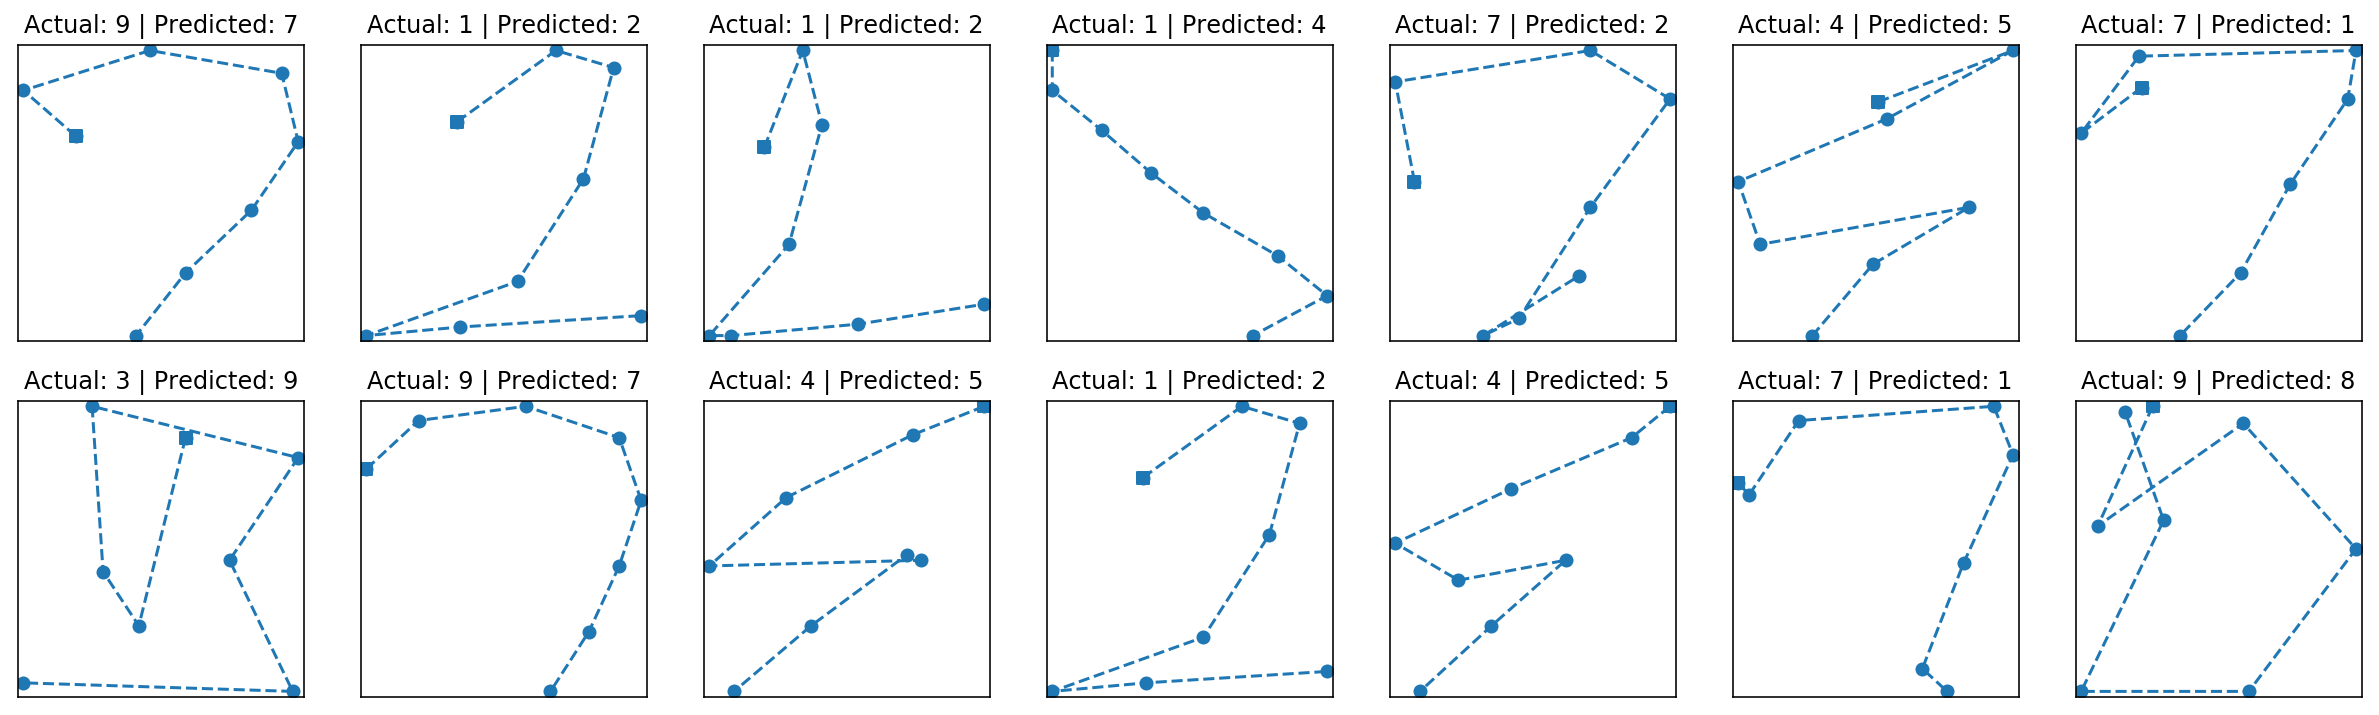

In [125]:
np.random.seed(1)
# y_pred = model.predict(Xtest)
misclassified = np.where((ytest!=knn.predict(Xtest)) & (ytest!=tree.predict(Xtest)) & (ytest!=svm.predict(Xtest)))[0]
r, c = 2,7
samples = np.random.choice(misclassified, r*c)
fig = plt.figure(figsize=(21,6))
for i in range(r*c):
    plt.subplot(r,c,i+1)
    p = Xtest.iloc[samples[i]].values.reshape((8,2))
    plt.plot(p[:,0],p[:,1],'--o')
    plt.scatter(p[0,0],p[0,1],marker='s')
    plt.title('Actual: '+str(ytest[samples[i]])+' | Predicted: '+str(y_pred[samples[i]]))
    plt.xlim((-2,102))
    plt.ylim((-2,102))
    plt.xticks([])
    plt.yticks([])
#     fig.suptitle('Examples misclassified by '+ name)
plt.show()

In [90]:
# from sys import getsizeof
# import pickle

In [ ]:
# svm_pkl=pickle.dumps(svm)
# tree_pkl=pickle.dumps(tree)
# knn_pkl=pickle.dumps(knn)

In [ ]:
getsizeof(svm_pkl)

In [ ]:
getsizeof(tree_pkl)

In [ ]:
getsizeof(knn_pkl)

In [ ]:
# with open('svm.pkl', 'wb') as f:
#     pickle.dump(svm, f)
# with open('tree.pkl', 'wb') as f:
#     pickle.dump(tree, f)
# with open('knn.pkl', 'wb') as f:
#     pickle.dump(knn, f)

SVM train accuracy: 0.9913252368877619
Decision Tree train accuracy: 0.9977312158014147
KNN train accuracy: 0.9971973842252769
SVM test accuracy: 0.9536745782098942
Decision Tree test accuracy: 0.915927938232771
KNN test accuracy: 0.9779811266800115
SVC


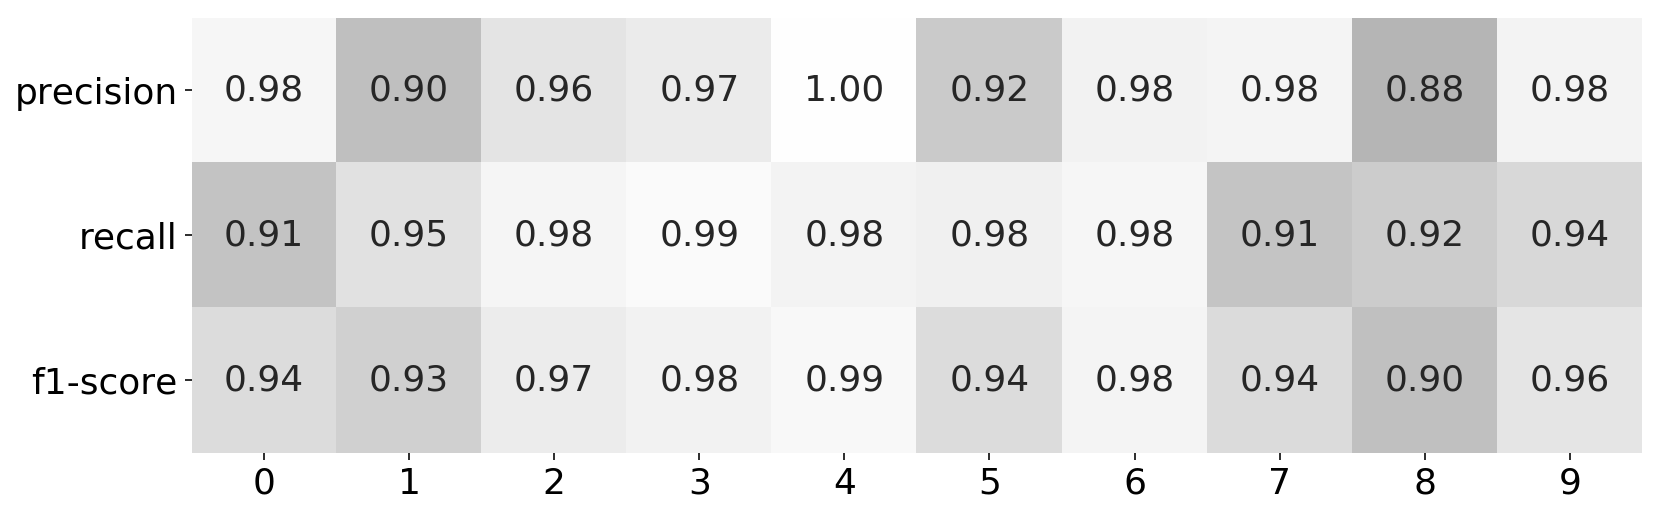

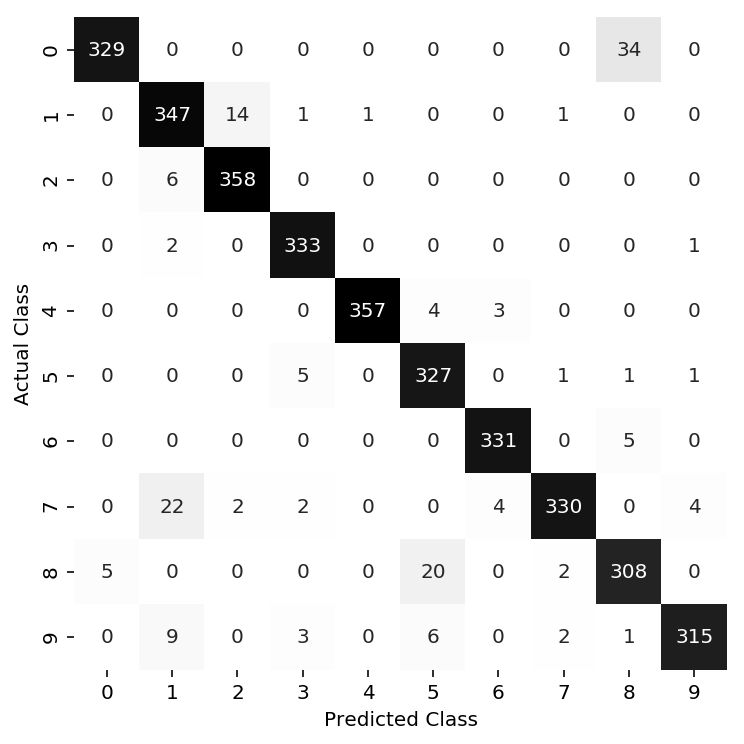

DecisionTreeClassifier


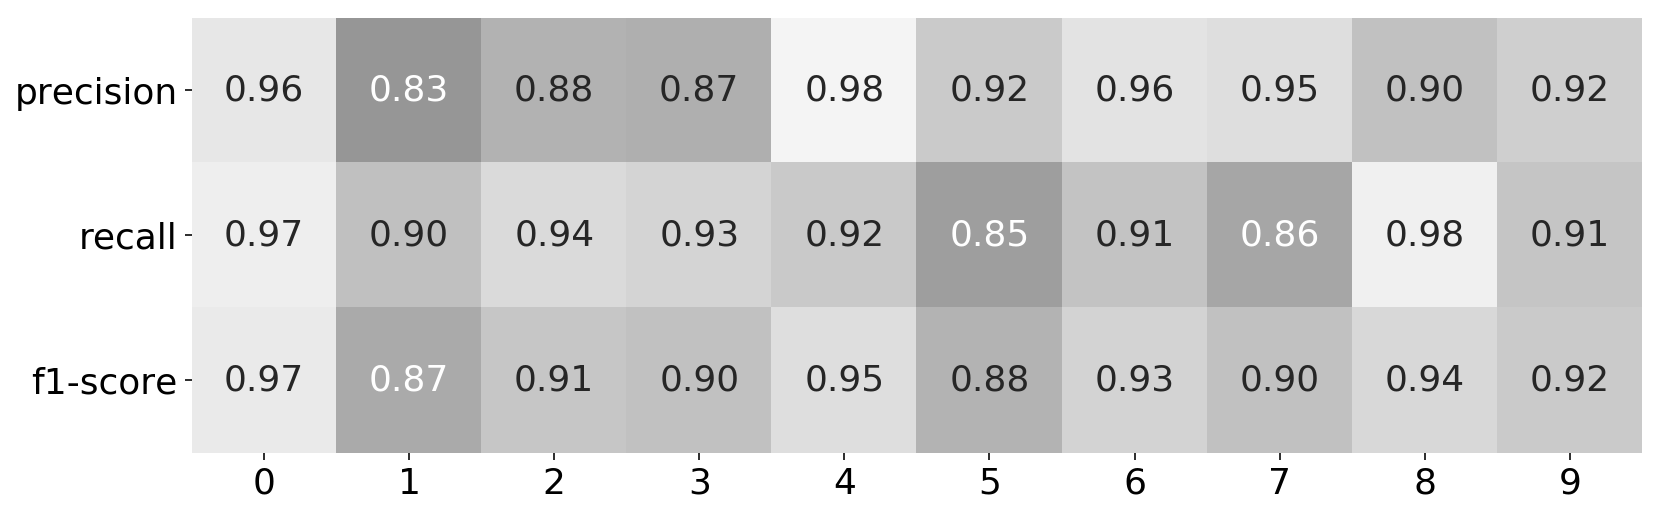

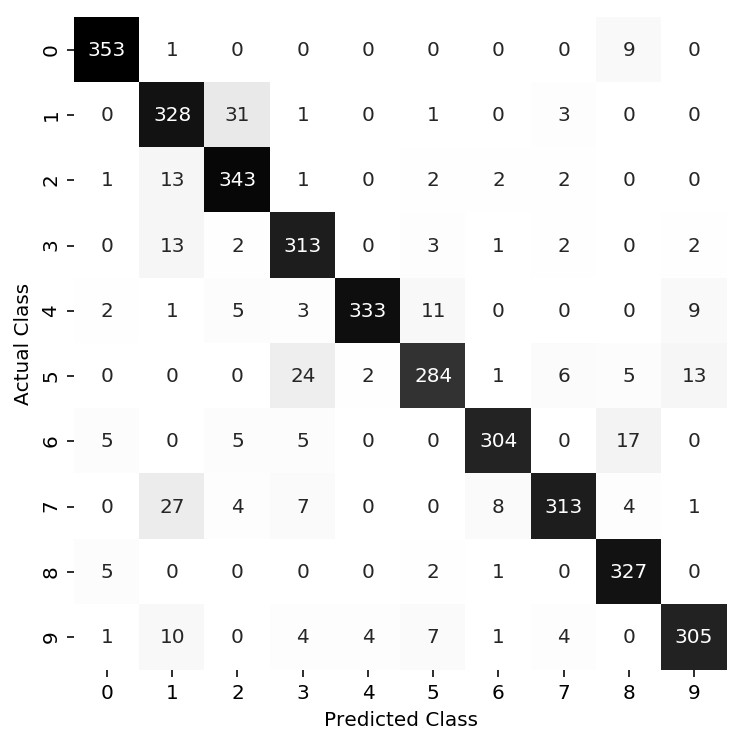

KNeighborsClassifier


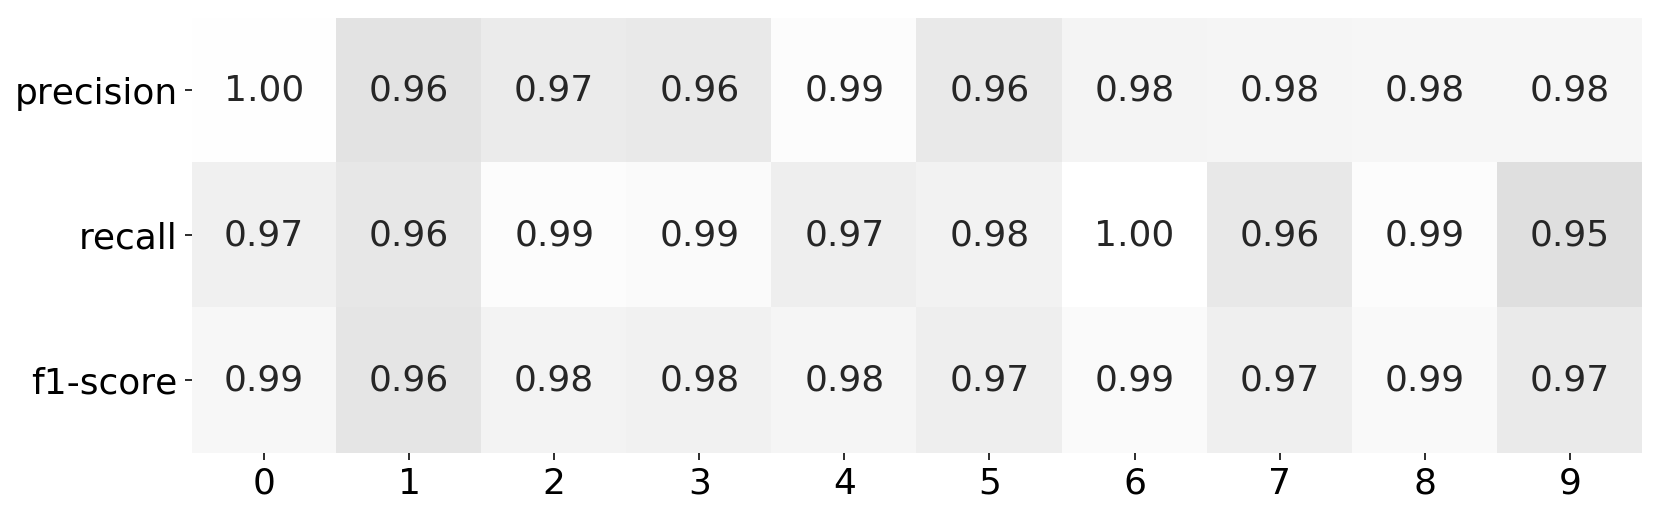

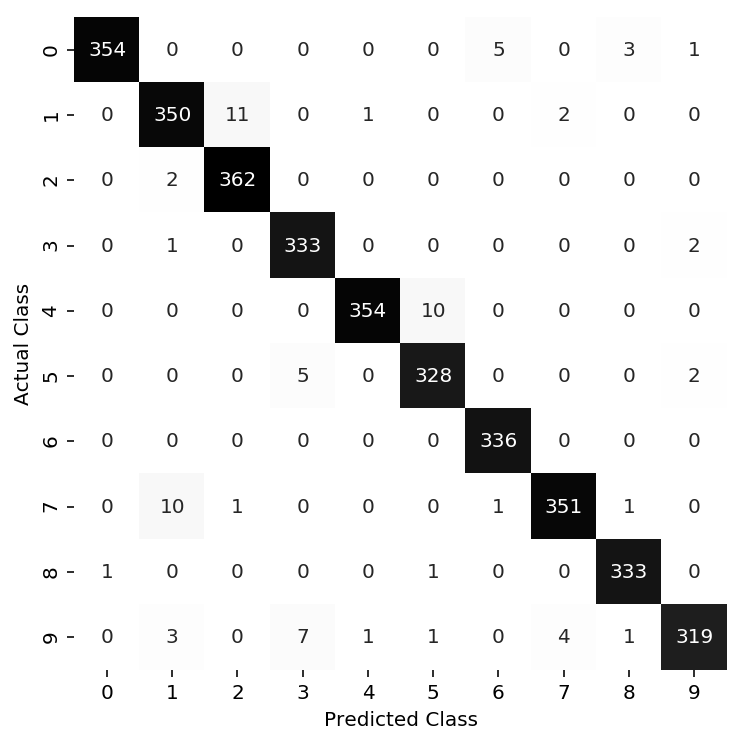

In [137]:
import pickle
with open('svm.pkl', 'rb') as f:
    svm = pickle.load(f)
with open('tree.pkl', 'rb') as f:
    tree = pickle.load(f)
with open('knn.pkl', 'rb') as f:
    knn = pickle.load(f)
print('SVM train accuracy: {}'.format(svm.score(Xtrain, ytrain)))
print('Decision Tree train accuracy: {}'.format(tree.score(Xtrain, ytrain)))
print('KNN train accuracy: {}'.format(knn.score(Xtrain, ytrain)))

print('SVM test accuracy: {}'.format(svm.score(Xtest, ytest)))
print('Decision Tree test accuracy: {}'.format(tree.score(Xtest, ytest)))
print('KNN test accuracy: {}'.format(knn.score(Xtest, ytest)))
for model in [svm,tree,knn]:
    y_pred = model.predict(Xtest)
    print(model.__class__.__name__)
    prf=pd.DataFrame(classification_report(ytest, y_pred, output_dict=True)).round(3)
#     print(prf.to_latex())
    prf = prf.drop('support', axis=0).drop(['micro avg','macro avg', 'weighted avg'], axis=1).iloc[[1,2,0]]
    plt.figure(figsize=(13,4))
    sns.heatmap(prf, annot=True, fmt='.2f', vmin=0.6, vmax=1,cbar=False, cmap='gray', annot_kws={"fontsize":18})
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18, rotation=0)
    plt.show()
    sns.heatmap(confusion_matrix(ytest, y_pred), annot=True, fmt='1', square=True, cbar=False, xticklabels=model.classes_, yticklabels=model.classes_, cmap='binary')
    plt.xlabel('Predicted Class')
    plt.ylabel('Actual Class')
    plt.show()

In [101]:
%%timeit -n 100
svm1=SVC(kernel='linear', C=0.01).fit(Xtrain, ytrain)

372 ms ± 12.8 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [99]:
%%timeit -n 100
tree1=DecisionTreeClassifier(max_depth=11, criterion='entropy').fit(Xtrain, ytrain)

62.3 ms ± 8.06 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [100]:
%%timeit -n 100
knn1=KNeighborsClassifier(n_neighbors=3).fit(Xtrain, ytrain)

7.03 ms ± 816 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [104]:
%%timeit -n 100
svm.predict(Xtest)

64.3 ms ± 3.6 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [105]:
%%timeit -n 100
tree.predict(Xtest)

1.51 ms ± 493 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [106]:
%%timeit -n 100
knn.predict(Xtest)

371 ms ± 11.6 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
